In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns
from sklearn.utils import shuffle
from numpy.linalg import inv
import warnings
warnings.filterwarnings('ignore')

#Copyright Iason Myttas 

LINEAR REGRESSION

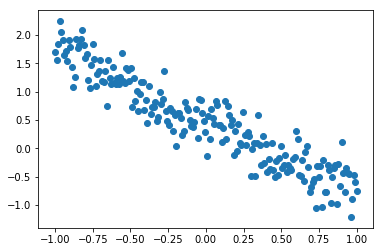

In [8]:

#parameters to generate data
X = np.linspace(-1,1,200)
X2 = np.linspace(-3,3,200)
a = [-1.3,0.5]
e = np.random.normal(0,0.3,200)
beta = 3

#original mean and cov of prior:
m0 = [0,0]
S0 = np.identity(2)
W = sp.multivariate_normal(mean=m0,cov=S0)

Y = a[0]*X + a[1]+ e #real observations

X,Y = shuffle(X,Y)
#plot lines given a prior's parameters
def plotlines(m,S):
  
    #plot 10 lines
    plt.figure()

    for i in range(10):
        W = np.random.multivariate_normal(m,S)

        x_vals = X2
        y_vals = W[0]*X2 + W[1]
        axes = plt.gca()
        axes.set_ylim([-3,3])
        axes.set_ylim([-3,3])

#         plt.subplot(121)
        plt.gca().set_aspect('equal', adjustable='box')

        plt.plot(X2, y_vals)

#plot the prior
def plotweights(m,S):
    W = sp.multivariate_normal(m,S)

    #for the weight plots we need all input combinations
    X2 = np.linspace(-3,3,200)
    x1, x2 = np.meshgrid(X2,X2)

    xy = np.column_stack([x1.flatten(),x2.flatten()])
    
    #reshape into pairs
    Z = W.pdf(xy).reshape(200,200)

#     plt.subplot(122)
    plt.figure()
    plt.gca().set_aspect('equal', adjustable='box')

    plt.contour(x1,x2,Z,cmap='jet', extent=(-2,2,-2,2))
    

#actual data
plt.scatter(X,Y)

<Figure size 360x288 with 0 Axes>

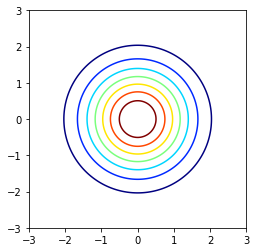

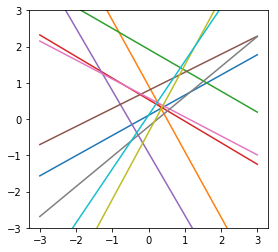

In [9]:
plt.figure(1,figsize=(5, 4))
plotweights(m0,S0)
plt.figure(2, figsize=(8.5,7))
plotlines(m0,S0)

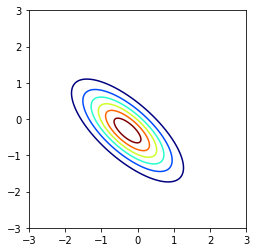

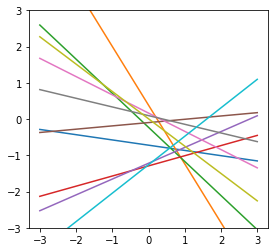

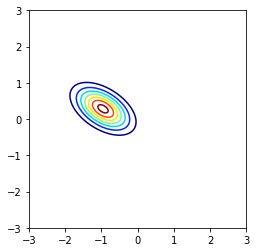

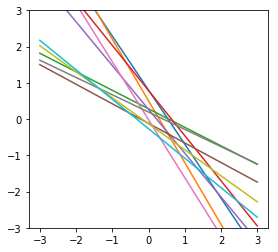

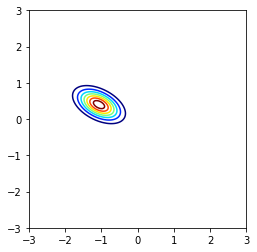

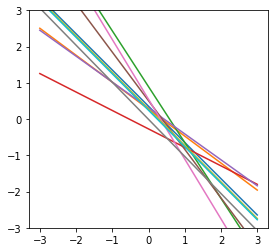

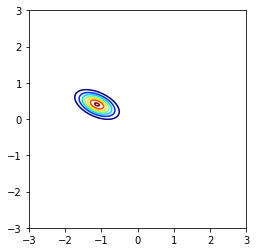

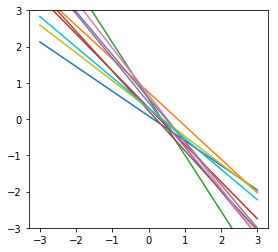

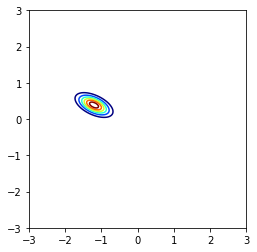

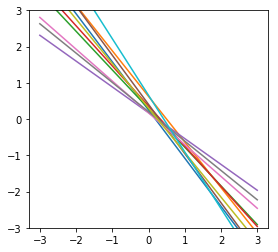

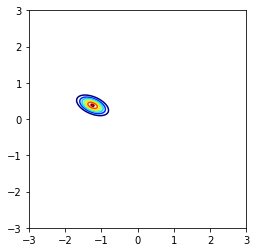

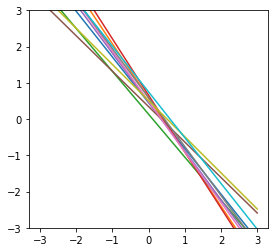

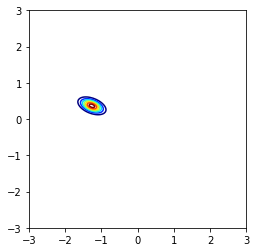

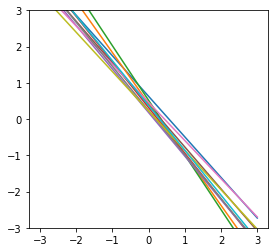

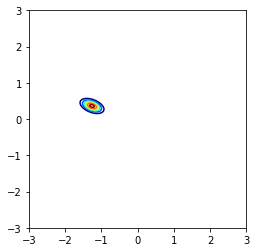

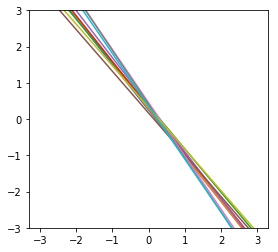

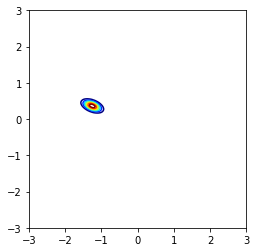

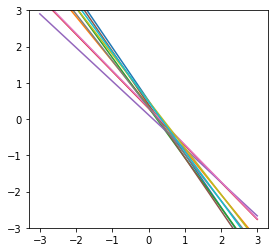

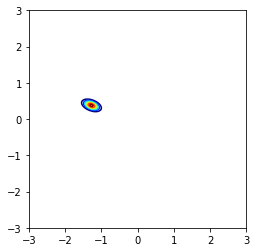

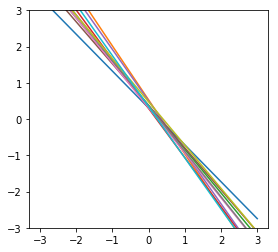

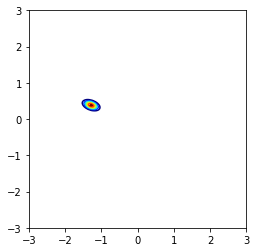

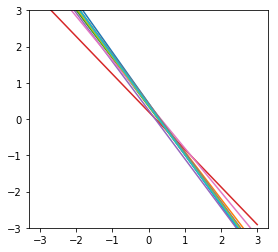

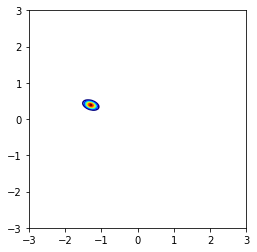

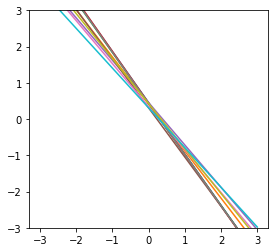

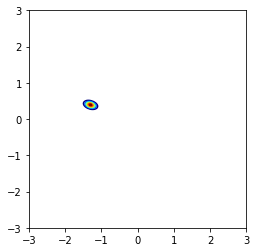

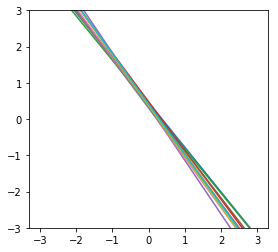

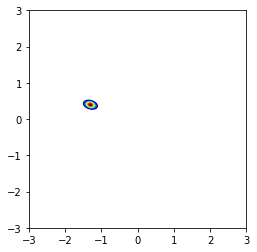

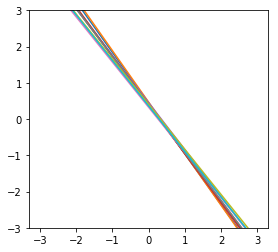

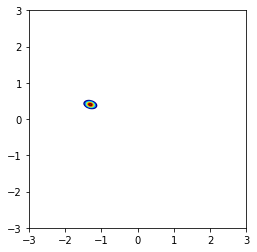

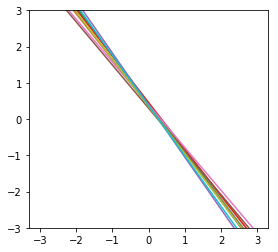

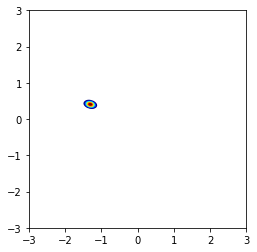

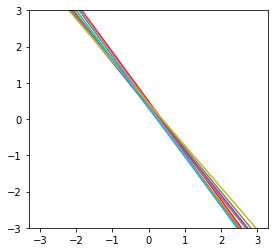

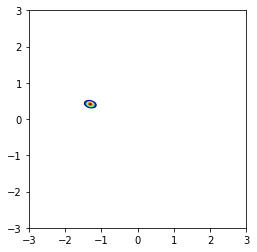

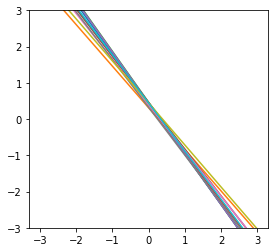

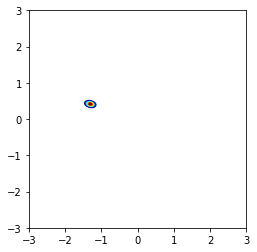

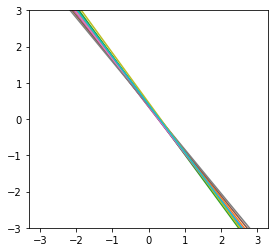

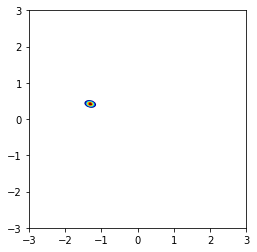

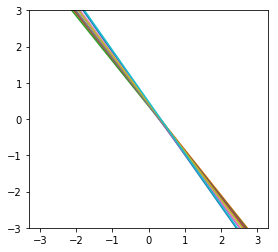

In [12]:
def getPosterior(n):
    m0_ = m0
    S0_ = S0
#     print(len(m0))
    ones = [1]*n
    for i in range(1,n):
#         print(i)
        x = np.array(list(zip(X[0:i],ones[0:i])))
        y = Y[0:i]
        
        #Calculate new covariance and mean
        SN = np.linalg.inv(np.linalg.inv(S0_) + beta*np.dot(x.T,x))
        mN = SN.dot(np.linalg.inv(S0_).dot(m0_) + beta*np.dot(x.T,y))
                
#         plt.figure(1)
#         plt.subplot(122)

        plotweights(mN, SN)
        plotlines(mN,SN)
        
        m0_ = mN
        S0_ = SN
        
        
    
getPosterior(20)

GAUSSIAN PROCESSES

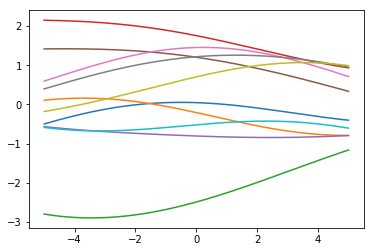

In [103]:
from scipy.spatial.distance import cdist

X = np.linspace(-5,5,800)
# print(X)

#cdist needs an extra pair of bracket
X_ = X.reshape(-1,1)
m = [0]*800

#definition of kernel function
def kernel(X1,X2,l):
    D = cdist(X1,X2)
    return np.exp(-1*D**2/l**2)

def plotpriors(length):
    Kmatrix = kernel(X_,X_,length)

    f = np.random.multivariate_normal(m,Kmatrix,10)
    plt.figure()
    plt.plot(X,f.T)


plotpriors(10)

In [114]:
from math import pi

e = np.random.normal(0,0.5,7)
X_train = np.linspace(-pi,pi,7)
X_train_ = X_train.reshape(-1,1)
Y_train = np.sin(X_train) + e
Y_train_ = Y_train.reshape(-1,1)
m = [0]*7

Posterior of Gaussian 

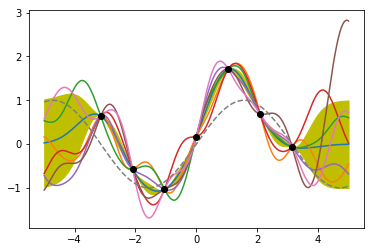

In [129]:



def plotposterior(X, X_train, Y_train, kernelLength, sigma):
    
    X_ = X.reshape(-1,1)

    #calculate covariance
    K = kernel(X_train, X_train,kernelLength)
#     K = K + np.identity(K.shape[0])
    Ks1 = kernel(X_train,X_,kernelLength)
    Ks2 = kernel(X_,X_train,kernelLength)
    Kss = kernel(X_, X_, kernelLength)

    #Calculate posterior mean and covariance
    m = np.dot(np.dot(Ks2,np.linalg.inv(K)),Y_train)
    Kmatrix = Kss - np.dot(Ks2,np.dot(inv(K),Ks1))

    plt.plot(X,m)
    
    high = m.flatten() + np.diag(Kmatrix)
    low = m.flatten() - np.diag(Kmatrix)

    #draw samples from the posterior
    f = np.random.multivariate_normal(m.flatten(),Kmatrix,6)
#     plt.plot(X,m)
#     plt.figure()
    plt.fill_between(X,high,low, color='y')
    plt.plot(X,f.T)

    
plotposterior(X, X_train_,Y_train_, 1, 0)
# print(X.flatten())
plt.plot(X, np.sin(X), '--')
plt.scatter(X_train,Y_train, color='black',zorder=3)

